<a href="https://colab.research.google.com/github/Usmantech125/Number-Prediction-Model/blob/main/Number_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import random

In [40]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [41]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [48]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [49]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes (digits 0–9)
])

In [50]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - accuracy: 0.8728 - loss: 0.4314 - val_accuracy: 0.9837 - val_loss: 0.0548
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9824 - loss: 0.0571 - val_accuracy: 0.9868 - val_loss: 0.0421
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.9893 - loss: 0.0370 - val_accuracy: 0.9872 - val_loss: 0.0404
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9915 - loss: 0.0267 - val_accuracy: 0.9888 - val_loss: 0.0375
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.9934 - loss: 0.0198 - val_accuracy: 0.9868 - val_loss: 0.0437


In [52]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9816 - loss: 0.0490


[0.038707185536623, 0.9861000180244446]

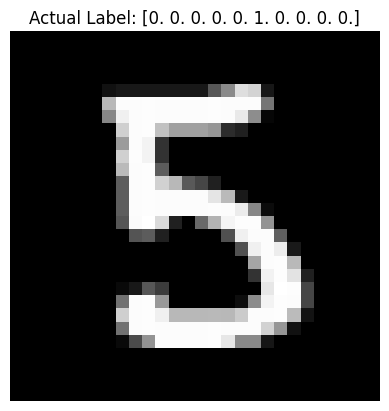

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Our model predicts it is a: 5


In [53]:
idx = random.randint(0, len(X_test) - 1)

plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
plt.title("Actual Label: " + str(y_test[idx]))
plt.axis('off')
plt.show()

# Predict
prediction = model.predict(X_test[idx].reshape(1, 28, 28, 1))
predicted_digit = np.argmax(prediction)

print("Our model predicts it is a:", predicted_digit)